In [23]:
%pylab inline
import pandas as pd 
import seaborn

Populating the interactive namespace from numpy and matplotlib


### Populating first 5 rows

In [2]:
uber=pd.read_csv("uber-raw-data-apr14.csv")
uber.head(3)

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512


### Displaying Data/Time in proper format by '.map(pandas.to_datetime)'

In [3]:
uber['Date/Time']=uber['Date/Time'].map(pd.to_datetime)

In [4]:
uber.head(3)

,Date/Time,Lat,Lon,Base
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512


In [5]:
dt=uber["Date/Time"][0]

In [6]:
dt.day
dt.dayofweek
dt.year
dt.hour
dt.minute
dt.second
dt.day_name()


'Tuesday'

### Adding one Column 'Dayofmonth' from 'DateTime'


In [7]:
def get_dayofthemonth(dt):
    return dt.day
uber['DayoftheMonth']=uber['Date/Time'].map(get_dayofthemonth) #here we are creating new column on LHS and to that adding value
                                                               #on RHS
uber.head()

,Date/Time,Lat,Lon,Base,DayoftheMonth
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1


### Adding 'Weekday' Colum from 'Date/Time'


In [8]:
def get_weekday(dt):
    return dt.weekday()
uber['Weekday']=uber['Date/Time'].map(get_weekday)

In [9]:
uber.head(3)

,Date/Time,Lat,Lon,Base,DayoftheMonth,Weekday
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,1
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,1
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,1


### Adding hour Column from Date/Time

In [10]:
def get_hour(dt):
    return dt.hour
uber['hour']=uber['Date/Time'].map(get_hour)

In [11]:
uber.head(3)

,Date/Time,Lat,Lon,Base,DayoftheMonth,Weekday,hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,1,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,1,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,1,0


In [12]:
uber.tail(3)

,Date/Time,Lat,Lon,Base,DayoftheMonth,Weekday,hour
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30,2,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30,2,23
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30,2,23


# Analysis

### Analyze the Day of the Month

In [13]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

Text(0.5,1,'Frequency by Day of the Month-Uber 2014')

C:\Users\Maau\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


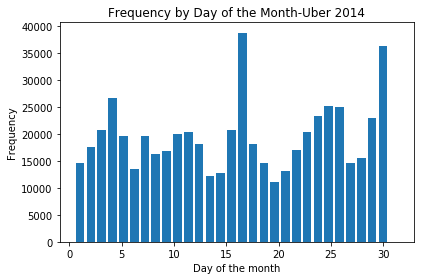

In [14]:
hist(uber.DayoftheMonth, bins=30, rwidth=.8, range=(0.5,31.5)) 
xlabel('Day of the month')
ylabel('Frequency')
title('Frequency by Day of the Month-Uber 2014')


In [15]:
def count(rows):
    return len(rows)

by_date=uber.groupby('DayoftheMonth').apply(count)
by_date

DayoftheMonth
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

C:\Users\Maau\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


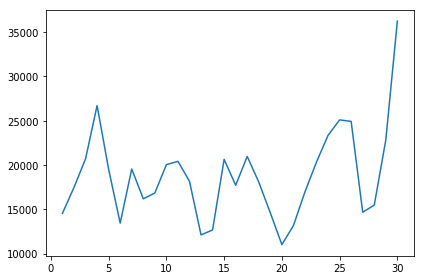

In [16]:
plot(by_date)

<BarContainer object of 30 artists>

C:\Users\Maau\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


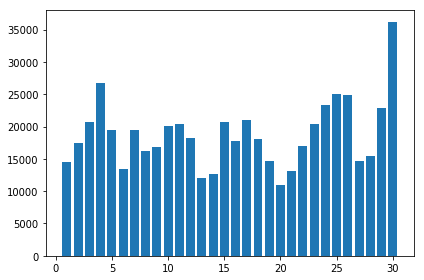

In [17]:
bar(range(1,31),by_date) 

In [56]:
by_date_sorted=by_date.sort_values()
by_date_sorted

DayoftheMonth
20    11017
13    12112
14    12674
21    13162
6     13445
1     14546
19    14602
27    14677
28    15475
8     16188
9     16843
22    16975
2     17474
16    17717
18    18074
12    18170
5     19521
7     19550
10    20041
23    20346
11    20420
15    20641
3     20701
17    20973
29    22835
24    23352
26    24925
25    25095
4     26714
30    36251
dtype: int64

Text(0.5,1,'Frequency by Day of the Month-Uber 2014')

C:\Users\Maau\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


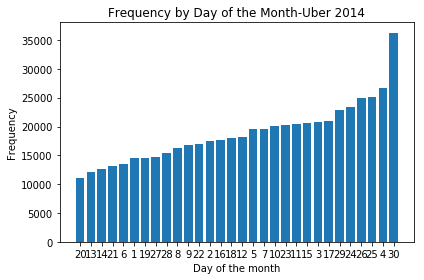

In [20]:
bar(range(1,31),by_date_sorted)
xticks(range(1,31), by_date_sorted.index);
xlabel('Day of the month')
ylabel('Frequency')
title('Frequency by Day of the Month-Uber 2014')

## analyze the hour

C:\Users\Maau\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


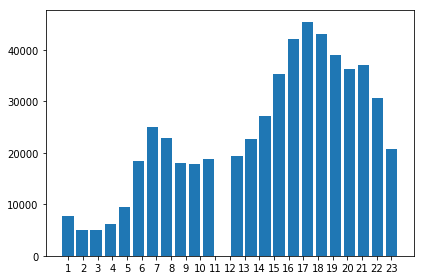

In [21]:
hist(uber.hour, bins=24, rwidth=0.8, range=(0.5,23.5))
xticks(range(1,24));

## analyze the weekday

([<matplotlib.axis.XTick at 0x231876c3b38>,
 <a list of 7 Text xticklabel objects>)

C:\Users\Maau\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


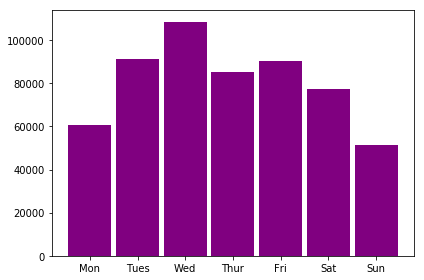

In [26]:
hist(uber.Weekday, bins=7, rwidth=0.9, color="purple", range=(-0.5,6.5))
xticks(range(7),'Mon Tues Wed Thur Fri Sat Sun'.split())

## Cross analysis Day of month and hour

In [37]:
def count_rows(a):
     return len(a)

In [57]:
by_hour_weekday=uber.groupby('Weekday hour'.split()).apply(count_rows).unstack()
by_hour_weekday

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Weekday,,,,,,,,,,,,,,,,,,,,,
0,518,261,238,571,1021,1619,2974,3888,3138,2211,...,3117,3818,4962,5574,4725,4386,3573,3079,1976,1091
1,765,367,304,516,887,1734,3766,5304,4594,2962,...,4489,6042,7521,8297,7089,6459,6310,5993,3614,1948
2,899,507,371,585,1003,1990,4230,5647,5242,3846,...,5438,7071,8213,9151,8334,7794,7783,6921,4845,2571
3,792,459,342,567,861,1454,3179,4159,3616,2654,...,4083,5182,6149,6951,6637,5929,6345,6585,5370,2909
4,1367,760,513,736,932,1382,2836,3943,3648,2732,...,4087,5354,6259,6790,7258,6247,5165,6265,6708,5393
5,3027,2479,1577,1013,706,704,844,1110,1372,1764,...,3042,4457,5410,5558,6165,5529,4792,5811,6493,5719
6,4542,2936,1590,1052,685,593,669,873,1233,1770,...,2934,3400,3489,3154,2795,2579,2276,2310,1639,1018


C:\Users\Maau\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


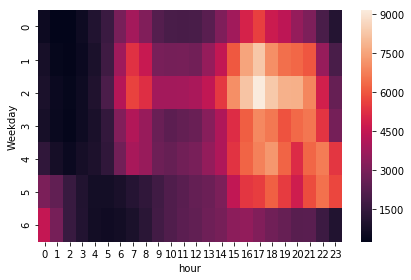

In [58]:
seaborn.heatmap(by_hour_weekday)


## by lat and long

C:\Users\Maau\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


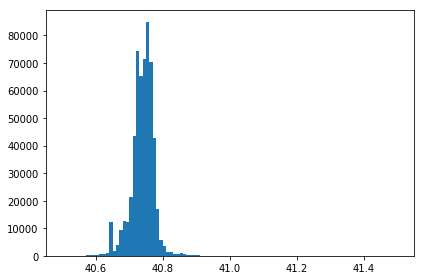

In [63]:
hist(uber.Lat, bins=100, range=(40.50, 41.50));

C:\Users\Maau\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


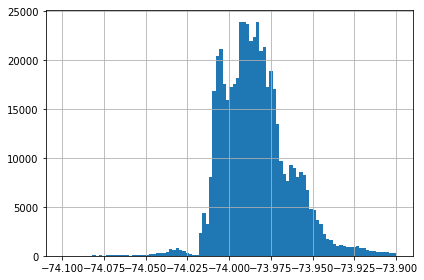

In [87]:
hist(uber.Lon, bins=100, range=(-74.1,-73.9))



C:\Users\Maau\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


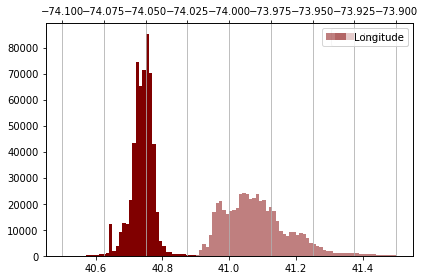

In [105]:
hist(uber.Lat, bins=100, range=(40.50, 41.50),color='maroon',label='Latitude');
legend(loc='best')
twiny()
grid()

hist(uber.Lon, bins=100, range=(-74.1,-73.9),color='maroon', alpha=.5, label='Longitude');
legend(loc='best')

C:\Users\Maau\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


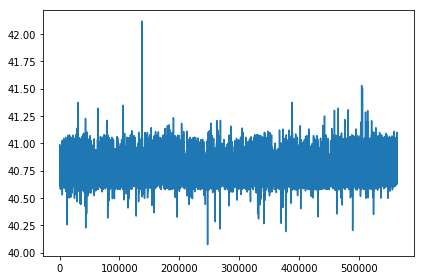

In [108]:
plot(uber.Lat)


# the first 100 we can see as below

(0, 100)

C:\Users\Maau\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


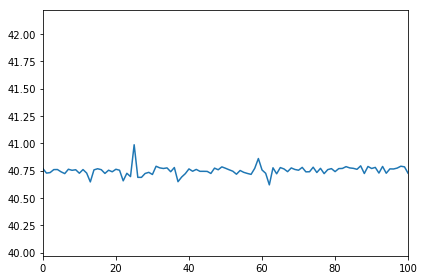

In [109]:
plot(uber.Lat)
xlim(0,100)

## instead of line we can use '.' 

(0, 100)

C:\Users\Maau\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


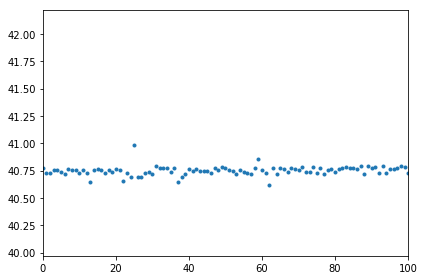

In [110]:
plot(uber.Lat,'.')
xlim(0,100)

## we can change the matter size as follows 

(0, 100)

C:\Users\Maau\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


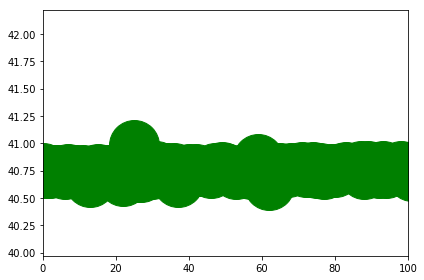

In [117]:
plot(uber.Lat, '.', ms=100, color='green')
xlim(0,100)

(0, 100)

C:\Users\Maau\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


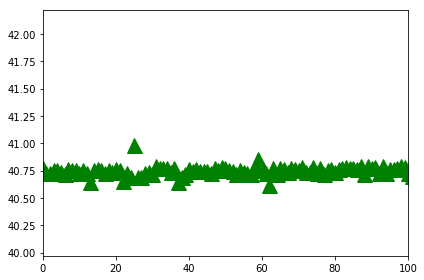

In [119]:
plot(uber.Lat, '^', ms=15, color='green',label='Lat')
xlim(0,100)

(0, 100)

C:\Users\Maau\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


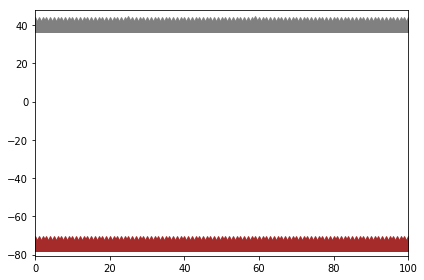

In [123]:
plot(uber.Lat, '^', ms=15, color='grey',label='Lat')
plot(uber.Lon, '^', ms=15, color='brown',label='Lon')
xlim(0,100)

C:\Users\Maau\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


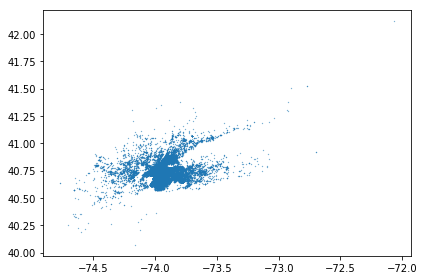

In [131]:
plot(uber.Lon, uber.Lat, '.',ms=.5)

(40.7, 41)

C:\Users\Maau\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


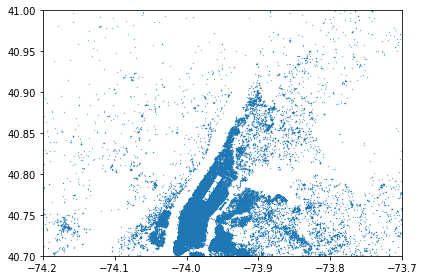

In [137]:

plot(uber.Lon, uber.Lat, '.',ms=.5)
xlim(-74.2, -73.7)
ylim(40.7,41)

(40.7, 41)

C:\Users\Maau\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


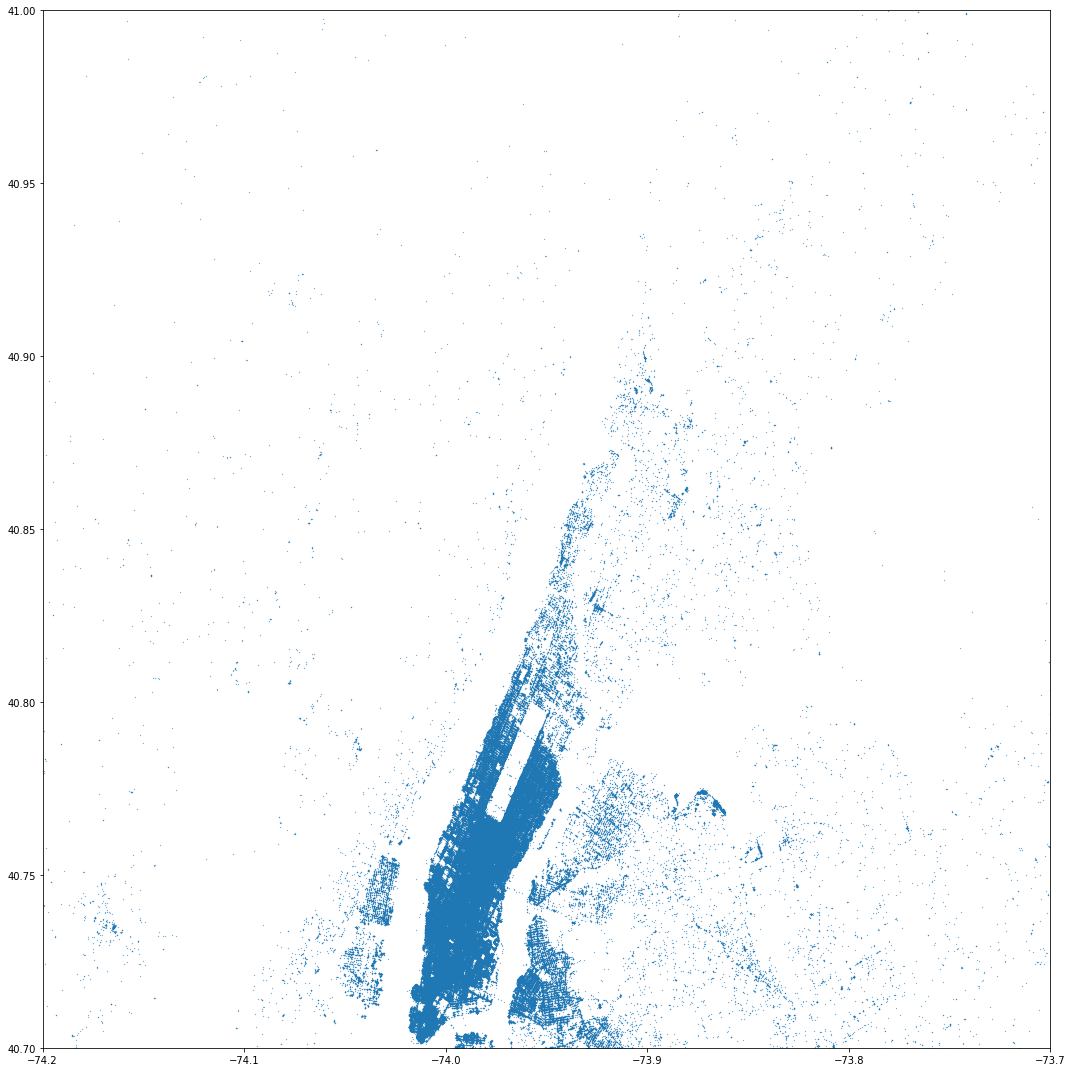

In [143]:
figure(figsize=(15,15))
plot(uber.Lon, uber.Lat, '.',ms=.5)
xlim(-74.2, -73.7)
ylim(40.7,41)